## **Latar Belakang**
Perusahaan transportasi umum jakarta ingin mencari investor untuk pengembangan tranportasi umum disuatu daerah yang sudah ditetapkan. Perusahaan tersebut melakukan survey terhadap rute dan jenis transportasi yang memiliki jumlah penumpang yang ramai. Perusahaan menetapkan daerah yang ingin dilakukan pengembangan yaitu dekat dengan Kawasan Industri Pulo Gadung (JIEP). Perusahaan menetapkan daerah tersebut karena mamiliki potensi kuat unutk pengembangan karena dekat dengan kawasan industri dan banyak masyarakat yang bekerja di daerah tersebut. Dengan itu, perusahaan ingin melihat bagaimana grafik penumpang yang melewati rute Pulo Gadung.

## **Pernyataan Masalah**
Perusahaan ingin mengetahui **rute dan jenis tranportasi mana saja yang memiliki potensi paling tinggi serta jumlah penumpang yang padat** untuk dijadikan tujuan dalam pengembangan transportasi umum agar masyarakat nyaman menggunakan transportasi umum sekitar daerah Pulo Gadung. Informasi ini berguna agar tidak salah sasaran dalam pengembangan transportasi agar investor tertarik untuk melakukan investasi.

#### Batasan Masalah
Dataset yang ada hanya tahun 2021 dimana sedang diberlakukan PPKM akibat wabah Covid-19.



## **Library**

In [41]:
import numpy as np
import pandas as pd
import missingno as msn


## **Data Preparation**

Dataset ini berisikan informasi mengenai data penumpang dan rute yang dilalui TransJakarta 2021.
<br><br>
Terdapat 6 kolom yang ada pada dataset ini, yaitu:
- tahun: year of the data is collected.
- bulan: month of the data is collected.
- jenis: type of vehicle.
- kode_trayek: route code.
- trayek: route.
- jumlah_penumpang: the number of passengers.


Berikut 5 baris teratas dan terbawah dari dataset Transjakarta Passanger

In [42]:
df = pd.read_csv('TransJakarta Passengers 2021.csv')
display(df.head(), df.tail())

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
0,2021,10,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197
1,2021,10,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711
2,2021,10,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186
3,2021,10,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883
4,2021,10,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,66616


,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
1468,2021,11,Angkutan Umum Integrasi,11Q,Kampung Melayu - Pulo Gebang via BKT,11353
1469,2021,11,Angkutan Umum Integrasi,11D,Pulo Gebang - Pulo Gadung 2 via PIK,59155
1470,2021,11,Angkutan Umum Integrasi,10K,Tanjung Priok - Senen via Taman BMW,34498
1471,2021,11,Angkutan Umum Integrasi,GR4,Taman Kota Intan - Museum Bahari,4
1472,2021,11,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,3


## **Data Cleansing**

Sebelum masuk analisis perlu mengetahui dataset yang dimiliki. Proses ini dilakukan untuk mengetahui penyimpangan apa saja yang ada pada dataset dan perlu ditangani dalam data cleaning.

Pertama kita akan melihat informasi jumlah kolom, jumlah baris, tipe data, serta data duplikat yang ada pada  dataset Transjakarta Passenger 2021.

In [43]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (1473, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tahun             1473 non-null   int64 
 1   bulan             1473 non-null   int64 
 2   jenis             1473 non-null   object
 3   kode_trayek       1473 non-null   object
 4   trayek            1471 non-null   object
 5   jumlah_penumpang  1473 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 69.2+ KB


In [44]:
pd.set_option('display.max_colwidth', 1)
pd.DataFrame(
    {
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value': [df[col].isna().sum() for col in df.columns],
    '%null_value': df.isna().mean().values * 100,
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
    }
)

,feature,data_type,null_value,%null_value,n_unique,sample_unique
0,tahun,int64,0,0.000000,1,[2021]
1,bulan,int64,0,0.000000,12,"[10, 8, 3, 6, 1, 5, 12, 9, 2, 7, 4, 11]"
2,jenis,object,0,0.000000,3,"[Mikrotrans, BRT, Angkutan Umum Integrasi]"
3,kode_trayek,object,0,0.000000,135,"[JAK.88, JAK.85, JAK.84, JAK.80, JA.77, JAK.75, JAK.74, JAK.73, JAK.72, JAK.71, JAK.64, JAK.61, JAK.60, JAK.59, JAK.58, JAK.56, JAK.54, JAK.53, JAK.52, JAK.51, JAK.50, JAK.49, JAK.47, JAK.46, JAK.45, JAK.44, JAK.43, JAK.42, JAK.41, JAK.40, JAK.39, JAK.38, JAK.37, JAK.36, JAK.35, JAK.34, JAK.33, JAK.32, JAK.31, JAK.30, JAK.29, JAK.28, JAK.27, JAK.26, JAK.25, JAK.24, JAK.22, JAK.21, JAK.20, JAK,19, JAK.18, JAK.17, JAK.16, JAK.15, JAK.14, JAK.13, JAK.12, JAK.117, JAK.112, JAK.11, JAK.10, JAK.09, JAK.08, JAK.07, JAK.06, JAK.05, JAK.04, JAK.03, JAK.02, JAK.01, 9, 8, 7, 6, 5, 4, 3, 2, 13, 12, 11, 10, 1, 9H, 9E, 9D, 8K, 8E, 8D, 8C, 7P, 7D, 7B, 7A, 6R, 6N, 6M, 6H, 6C, 5M, ...]"
4,trayek,object,2,0.135777,136,"[Terminal Tanjung Priok - Ancol Barat, Bintara - Cipinang Indah, Terminal Kampung Melayu - Kapin Raya, Rawa Buaya - Rawa Kompeni, Tanjung Priok - Jembatan Item, Cililitan - Kp. Pulo, Terminal Rawamangun - Cipinang Muara, Jambore Cibubur - Pasar Rebo, Kampung Rambutan - Pasar Rebo via Poncol, Kampung Rambutan - Pinang Ranti, Lenteng Agung - Aseli, Cempaka Putih - Pulo Gadung via Kelapa Gading, Kelapa Gading - Rusun Kemayoran, Rawamangun - Tanah Merah, Cilingcing - Rorotan, Grogol - Srengseng, Grogol - Benhil, Grogol - Pos Pengumben via Slipi, Kalideres - Muara Angke, Taman Kota - Budi Luhur, Kalideres - Puri Kembangan, Lebak Bulus - Cipulir, Pasar Minggu - Ciganjur via KB Ragunan, Pasar Minggu - Jagakarsa, Lebak Bulus - Ragunan, Andara - Stasiun Universitas Pancasila, Tongtek - Cililitan, Kampung Melayu - Pondok Kelapa, Kampung Melayu - Ppulo Gadung, Harapan Baru - Pulo Gebang via Rawa Kuning, Kalimalang - Duren Sawit, Bulak Ringin - Kampung Rambutan, Cililitan - Condet via Kayu Manis, Cilangkap - Cililitan, Pangkalan Jati - Rawamangun, Rawamangun - Klender, Pulo Gadung - Kota, Lebak Bulus - Petukangan, Blok M - Andara, Grogol - Meruya via Roxy, Tanjung Priok - Sukapura, Kp. Rambutan - Taman Wiladatika, Pulo Gebang - Rorotan, Rawamangun - Duren Sawit, Kp. Rambutan - Kalisari, Senen - Pulo Gadung via Kelapa Gading, Dwikora - Penas Kalimalang, Cililitan - Dwikora, Cawang UKI - Lubang Buaya, Pinang Ranti - Kampung Rambutan, Kalibata - Kuningan, Senen - Pulo Gadung , Bulak Turi - Tanjung Priok, Tanah Abang - Meruya, Tanah Abang - Kota Intan via Jembatan Lima, Tanah Abang - Kebayoran Lama via Pos Pengumben, Tanjung Priok - Tanah Merdeka, Terminal Tanah Merah - Pulo Gadung, Tanah Abang - Kebayoran Lama , Tanah Abang - Kota , Roxy Mas - Karet, Roxy - Benhil, Tanah Abang - Grogol via Tawakal, Kampung Rambutan - Pondok Gede, Semper - Rorotan, Grogol - Tubagus Angke, Lebak Bulus - Andara, Kampung Melayu - Duren Sawit, Tanjung Priok - Plumpang, Pinang Ranti - Pluit, Lebak Bulus - Harmoni, Kampung Rambutan - Kampung Melayu, Ragunan - Dukuh Atas 2, Kampung Melayu - Ancol, Pulo Gadung 2 - Tosari, Kalideres - Pasar Baru, Pulo Gadung 1 - Harmoni, Ciledug - Tendean, Penjaringan - Sunter Bouleverd Barat, Pulo Gebang - Kampung Melayu, Tanjung Priok - PGC 2, Blok M - Kota, Cipedak - Blok M, Kebayoran Lama - Jelambar, Pasar Minggu - Tanah Abang, Batu Sari-Tanah Abang, Bintaro - Blok M, Joglo - Blok M, Kebayoran Lama - Tanah Abang, Pondok Kelapa - BKN, Pancoran - TMII, Kampung Rambutan - Blok M, Kampung Rambutan - Lebak Bulus, Ragunan - Stasin MRT Fatmawati, Ragunan - Blok M via Kemang, Stasiun Manggarai - Blok M, Senen - Lebak Bulus, Stasin Tebet - Karet via Patra Kuningan, Kampung Melayu - Tanah Abang via Cikini, Kampung Melayu - Tanah Abang, ...]"
5,jumlah_penumpang,int64,0,0.000000,1420,"[31197, 30711, 40186, 61883, 66616, 50363, 50676, 75846, 97831, 57649, 52926, 35233, 69665, 72106, 91654, 49293, 41815, 46344, 65266, 104140, 69097, 44014, 50597, 83425, 48167, 64885, 94923,

In [45]:
df.describe(include='all')

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
count,1473.0,1473.000000,1473,1473,1471,1.473000e+03
unique,NaN,NaN,3,135,136,NaN
top,NaN,NaN,Mikrotrans,JAK.88,Cililitan - Condet via Kayu Manis,NaN
freq,NaN,NaN,848,12,24,NaN
mean,2021.0,6.534963,NaN,NaN,NaN,8.167586e+04
std,0.0,3.446451,NaN,NaN,NaN,1.265331e+05
min,2021.0,1.000000,NaN,NaN,NaN,0.000000e+00
25%,2021.0,4.000000,NaN,NaN,NaN,2.501600e+04
50%,2021.0,7.000000,NaN,NaN,NaN,4.962800e+04
75%,2021.0,10.000000,NaN,NaN,NaN,7.513800e+04


In [46]:
df[df.duplicated()]

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang


Dari informasi diatas didapatkan bahwa:
- Dataset Transjakarta Passenger memiliki 6 kolom dan 1473 baris.
- Pada kolom `kode_trayek` berisikan unique value dimana setiap data memiliki kode tersendiri
- Pada kolom `trayek`, terdapat missing value. Missing value tersebut diwakili dengan data NaN.
- Pola data `kode_trayek` dan `trayek` memiliki keterkaitan yang kuat, dimana `kode_trayek` menunjukkan kode untuk `trayek` (rute) Transjakarta pada tahun 2021.
- Pada kolom `kode_trayek` terdapat kesalahan penulisan dimana JA.77 seharusnya JAK.77.
- Pada kolom `trayek` terdapat beberapa penulisan yang typo, seperti penulisan huruf yang double pada suatu kata.
- Tidak terdapat data duplikat dimana data setiap kolom tidak memiliki data yang sama.


#### **Missing Values**

In [47]:
# persentase missing value setiap kolom
df.isna().sum()/df.shape[0]*100

tahun               0.000000
bulan               0.000000
jenis               0.000000
kode_trayek         0.000000
trayek              0.135777
jumlah_penumpang    0.000000
dtype: float64

<Axes: >

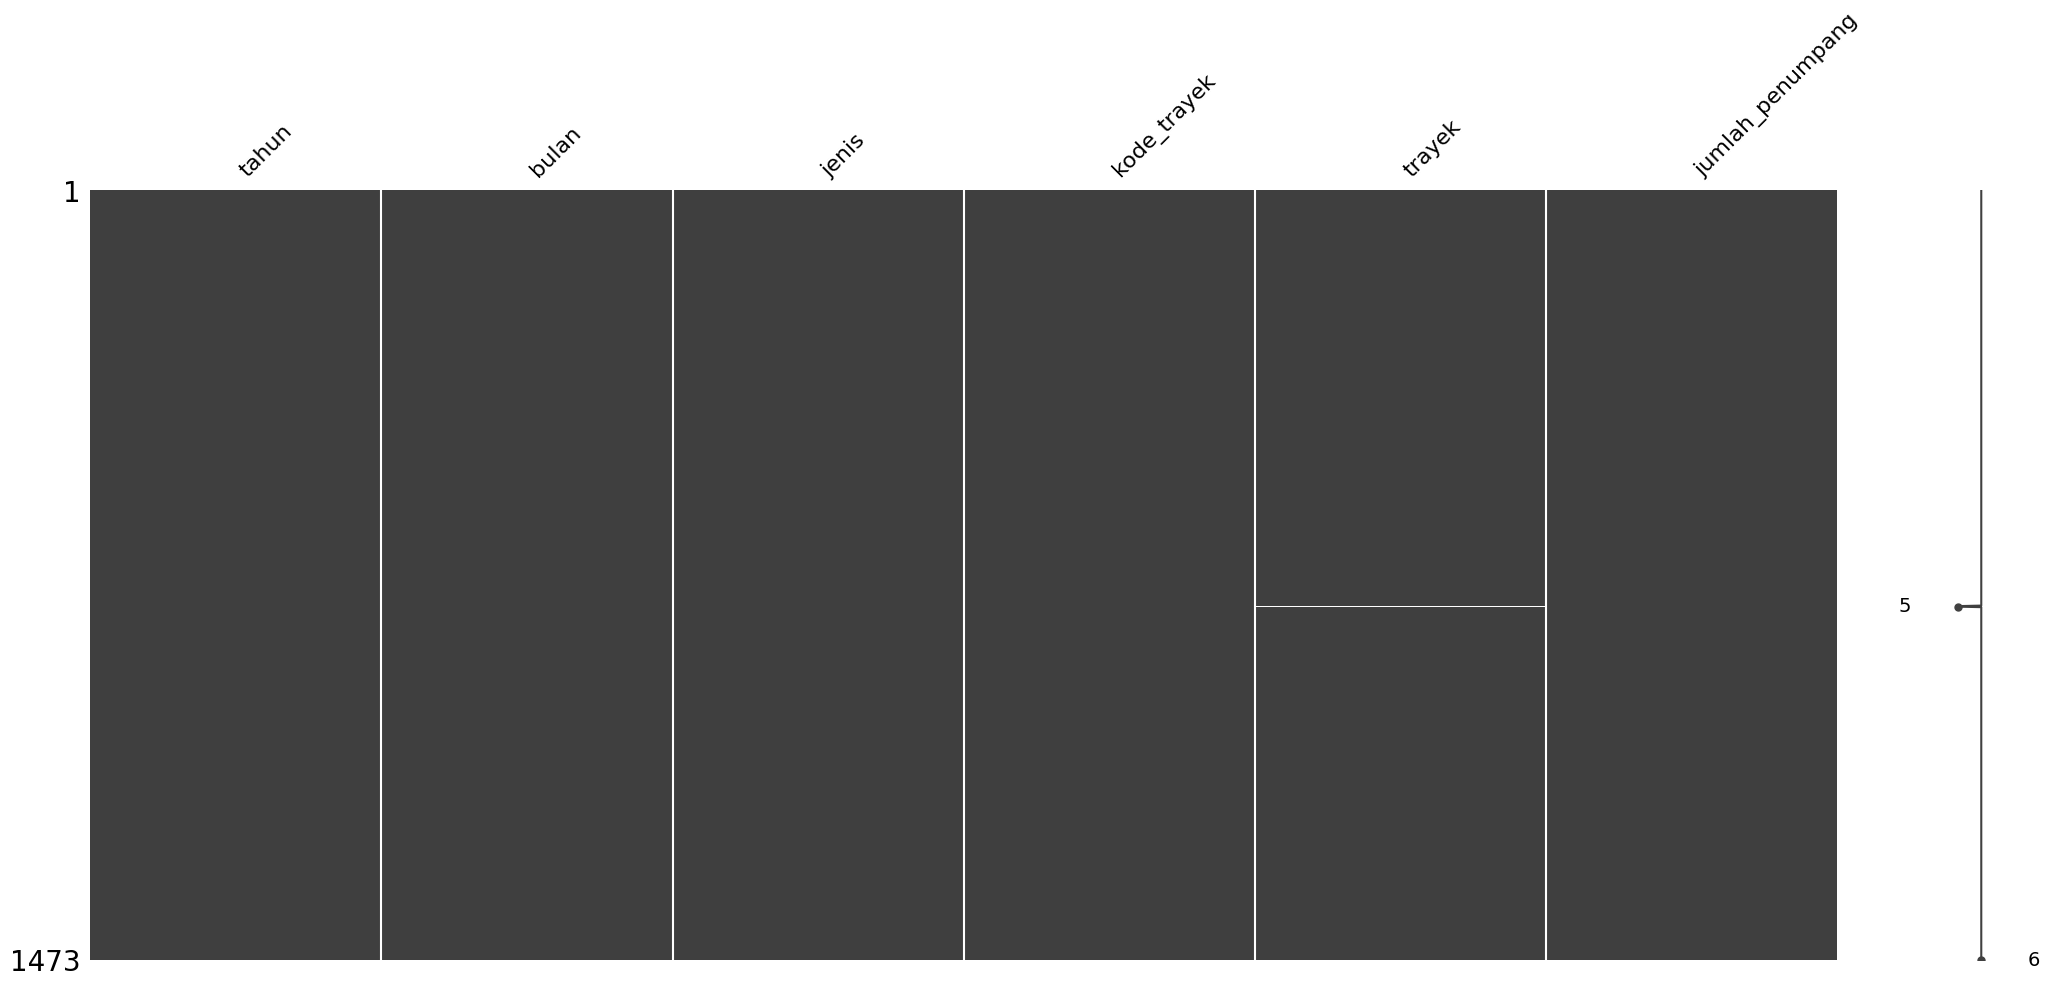

In [48]:
msn.matrix(df)

Diketahui bahwa terdapat missing value pada kolom `trayek` yang memiliki presentase 0.13%. Dengan data missing value yang hanya 0.13%, bisa saja kita membuang data tersebut. Tetapi, karena data yang hilang menjelaskan data dari kolom `kode_trayek` dan kita dapat menemukan data tersebut dari website official Transjakarta, maka data hilang tersebut dapat diisi dengan data yang sesuai.

In [49]:
# display nan values
df[df.isna().any(axis=1)]

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
795,2021,12,Mikrotrans,JAK.10B,NaN,4085
796,2021,12,Mikrotrans,JAK.10A,NaN,33992


In [50]:
# fill nan values in trayek
df.loc[796,'trayek'] = 'Gondangdia - Cikini via Salemba Raya'
df.loc[795,'trayek'] = 'Gondangdia - Cikini via Kramat Raya'

df.loc[[795,796],:]

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
795,2021,12,Mikrotrans,JAK.10B,Gondangdia - Cikini via Kramat Raya,4085
796,2021,12,Mikrotrans,JAK.10A,Gondangdia - Cikini via Salemba Raya,33992


#### **Incorrect Word**

Selain missing value, kita menghandle menulisan kata yang salah. Penulisan yang salah dapat menyebabkan data menjadi rancu. Seperti terdapat penambahan white space, mengecek data yang double tetapi tidak pada semua kolom, serta penulisan `kode_trayek` dan `trayek` yang tidak sesuai.

In [51]:
# Menghapus white space pada kode trayek
df['kode_trayek'] = df['kode_trayek'].str.strip()

In [52]:
# Menghapus white space pada trayek
df['trayek'] = df['trayek'].str.strip()

In [53]:
# cek kode trayek yang memiliki trayek double
doubleCode = df.groupby('kode_trayek')['trayek'].nunique()
doubleCode[doubleCode > 1]

kode_trayek
1A        2
3E        2
4         2
JAK.01    2
JAK.41    2
Name: trayek, dtype: int64

In [54]:
# cek trayek yang memiliki kode trayek double
doubleTrayek = df.groupby('trayek')['kode_trayek'].nunique()
doubleTrayek[doubleTrayek > 1]

trayek
Cililitan - Condet via Kayu Manis    2
Tanjung Priok - Jembatan Item        2
Name: kode_trayek, dtype: int64

In [55]:
# Handling kode trayek dan trayek yang memiliki values lebih dari 1
df.loc[(df['kode_trayek'] == '1A') & (df['trayek'] == 'PIK - Balai Kota'), 'trayek'] = 'Pantai Maju - Balai Kota'
df.loc[(df['kode_trayek'] == '3E') & (df['trayek'] == 'Puri Kembangan - Sentraland Cengkareng'), 'trayek'] = 'Sentraland Cengkareng - Puri Kembangan'
df.loc[(df['kode_trayek'] == '4') & (df['trayek'] == 'Pulo Ggadung 2 - Tosari'), 'trayek'] = 'Pulo Gadung 2 - Tosari'
df.loc[(df['kode_trayek'] == 'JAK.01') & (df['trayek'] == 'Ttanjung Priok - Plumpang'), 'trayek'] = 'Tanjung Priok - Plumpang'
df.loc[(df['kode_trayek'] == 'JAK.41') & (df['trayek'] == 'Kampung Melayu - Ppulo Gadung'), 'trayek'] = 'Kampung Melayu - Pulo Gadung'
df.loc[(df['kode_trayek'] == 'JAK.16') & (df['trayek'] == 'Cililitan - Condet via Kayu Manis'), 'trayek'] = 'Cililitan - Condet'
df.loc[(df['trayek'] == 'Tanjung Priok - Jembatan Item') & (df['kode_trayek'] == 'JA.77'), 'kode_trayek'] = 'JAK.77'

In [58]:
# memastikan kode_trayek tidak ada yang double
doubleCode = df.groupby('kode_trayek')['trayek'].nunique()
doubleCode[doubleCode > 1]

Series([], Name: trayek, dtype: int64)

In [59]:
# memastikan trayek tidak ada yang double
doubleTrayek = df.groupby('trayek')['kode_trayek'].nunique()
doubleTrayek[doubleTrayek > 1]

Series([], Name: kode_trayek, dtype: int64)

In [117]:
# replace trayek dan kode trayek yang memiliki penulisan yang salah

df.loc[(df['kode_trayek'] == 'JAK. 10B') & (df['trayek'] == 'Gondangdia - Cikini via Kramat Jaya'), 'trayek'] = 'Gondangdia - Cikini via Kramat Raya'
df.loc[(df['trayek'] == 'Gondangdia - Cikini via Kramat Raya') & (df['kode_trayek'] == 'JAK. 10B'), 'kode_trayek'] = 'JAK.10B'
df.loc[(df['trayek'] == 'Pinang Ranti - Kampung Rambutan') & (df['kode_trayek'] == 'JAK,19'), 'kode_trayek'] = 'JAK.19'
df.loc[(df['kode_trayek'] == '6R') & (df['trayek'] == 'Ragunan - Stasin MRT Fatmawati'), 'trayek'] = 'Ragunan - Stasiun MRT Fatmawati'
df.loc[(df['kode_trayek'] == '6C') & (df['trayek'] == 'Stasin Tebet - Karet via Patra Kuningan'), 'trayek'] = 'Stasiun Tebet - Karet via Patra Kuningan'

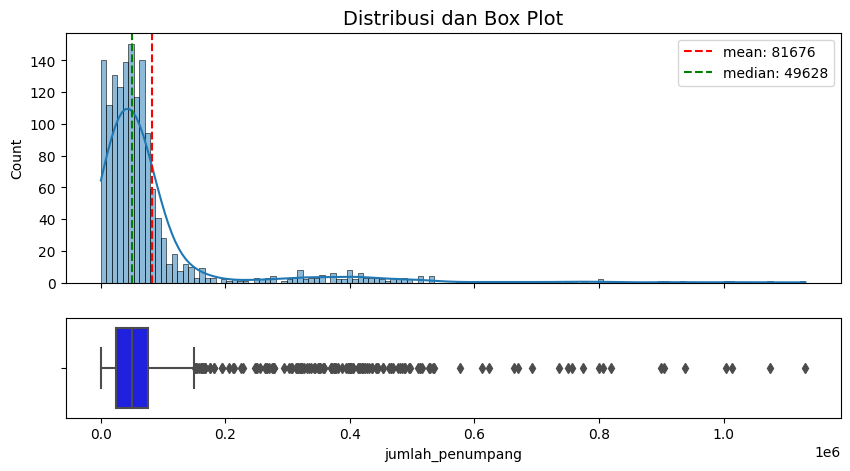

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat figure dan axes
fig, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1, figsize=(10,5), sharex=True, gridspec_kw={'height_ratios':[5, 2]})


# Menggabungkan displot dan boxplot menggunakan Seaborn
sns.histplot( x=df.jumlah_penumpang, kde=True, ax=ax1)  # Menampilkan displot
sns.boxplot(x=df.jumlah_penumpang, ax=ax2, color='Blue') # Menampilkan boxplot

# Menambahkan garis rata-rata dan median
ax1.axvline(x=df['jumlah_penumpang'].mean(), color='red', label=f"mean: {round(df['jumlah_penumpang'].mean())}", linestyle='--')
ax1.axvline(x=df['jumlah_penumpang'].median(), color='green', label=f"median: {round(df['jumlah_penumpang'].median())}", linestyle='--')

# Memberikan judul dan label pada sumbu
ax1.set_title('Distribusi dan Box Plot', fontsize=14)
ax1.set_xlabel('jumlah_penumpang', fontsize=12)

# Menampilkan legenda
ax1.legend()

# Menampilkan plot
plt.show()

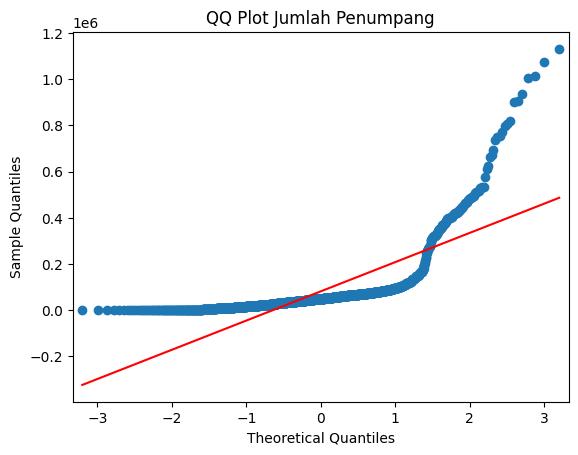

In [62]:
import statsmodels.api as sm

# Membuat QQ plot
sm.qqplot(df.jumlah_penumpang, line='s')

# Memberikan judul pada plot berdasarkan nama kolom
plt.title(f"QQ Plot Jumlah Penumpang")

# Menampilkan plot
plt.show()

In [63]:
from scipy.stats import shapiro

# Shapiro-Wilk
statistic, p_value = shapiro(df.jumlah_penumpang)

# Cek apakah data terdistribusi normal dengan tingkat signifikansi 0.05
if p_value > 0.05:
    print(p_value,"Data terdistribusi normal.")
else:
    print(p_value,"Data tidak terdistribusi normal.")

0.0 Data tidak terdistribusi normal.


#### **Handling Outliers**

Sebelum melakukan analisa data, dilakukan handling outlier agar data yang bersih tidak menjadi bias. Outlier merupakan data yang menyimpang jauh dari data lainnya. Handling outlier ini menggunakan pengelompokan data berdasarkan `jenis` dan `jumlah_penumpang`.

In [64]:
pd.DataFrame(
    {
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value': [df[col].isna().sum() for col in df.columns],
    '%null_value': df.isna().mean().values * 100,
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
    }
)

,feature,data_type,null_value,%null_value,n_unique,sample_unique
0,tahun,int64,0,0.0,1,[2021]
1,bulan,int64,0,0.0,12,"[10, 8, 3, 6, 1, 5, 12, 9, 2, 7, 4, 11]"
2,jenis,object,0,0.0,3,"[Mikrotrans, BRT, Angkutan Umum Integrasi]"
3,kode_trayek,object,0,0.0,132,"[JAK.88, JAK.85, JAK.84, JAK.80, JAK.77, JAK.75, JAK.74, JAK.73, JAK.72, JAK.71, JAK.64, JAK.61, JAK.60, JAK.59, JAK.58, JAK.56, JAK.54, JAK.53, JAK.52, JAK.51, JAK.50, JAK.49, JAK.47, JAK.46, JAK.45, JAK.44, JAK.43, JAK.42, JAK.41, JAK.40, JAK.39, JAK.38, JAK.37, JAK.36, JAK.35, JAK.34, JAK.33, JAK.32, JAK.31, JAK.30, JAK.29, JAK.28, JAK.27, JAK.26, JAK.25, JAK.24, JAK.22, JAK.21, JAK.20, JAK,19, JAK.18, JAK.17, JAK.16, JAK.15, JAK.14, JAK.13, JAK.12, JAK.117, JAK.112, JAK.11, JAK.10, JAK.09, JAK.08, JAK.07, JAK.06, JAK.05, JAK.04, JAK.03, JAK.02, JAK.01, 9, 8, 7, 6, 5, 4, 3, 2, 13, 12, 11, 10, 1, 9H, 9E, 9D, 8K, 8E, 8D, 8C, 7P, 7D, 7B, 7A, 6R, 6N, 6M, 6H, 6C, 5M, ...]"
4,trayek,object,0,0.0,132,"[Terminal Tanjung Priok - Ancol Barat, Bintara - Cipinang Indah, Terminal Kampung Melayu - Kapin Raya, Rawa Buaya - Rawa Kompeni, Tanjung Priok - Jembatan Item, Cililitan - Kp. Pulo, Terminal Rawamangun - Cipinang Muara, Jambore Cibubur - Pasar Rebo, Kampung Rambutan - Pasar Rebo via Poncol, Kampung Rambutan - Pinang Ranti, Lenteng Agung - Aseli, Cempaka Putih - Pulo Gadung via Kelapa Gading, Kelapa Gading - Rusun Kemayoran, Rawamangun - Tanah Merah, Cilingcing - Rorotan, Grogol - Srengseng, Grogol - Benhil, Grogol - Pos Pengumben via Slipi, Kalideres - Muara Angke, Taman Kota - Budi Luhur, Kalideres - Puri Kembangan, Lebak Bulus - Cipulir, Pasar Minggu - Ciganjur via KB Ragunan, Pasar Minggu - Jagakarsa, Lebak Bulus - Ragunan, Andara - Stasiun Universitas Pancasila, Tongtek - Cililitan, Kampung Melayu - Pondok Kelapa, Kampung Melayu - Pulo Gadung, Harapan Baru - Pulo Gebang via Rawa Kuning, Kalimalang - Duren Sawit, Bulak Ringin - Kampung Rambutan, Cililitan - Condet via Kayu Manis, Cilangkap - Cililitan, Pangkalan Jati - Rawamangun, Rawamangun - Klender, Pulo Gadung - Kota, Lebak Bulus - Petukangan, Blok M - Andara, Grogol - Meruya via Roxy, Tanjung Priok - Sukapura, Kp. Rambutan - Taman Wiladatika, Pulo Gebang - Rorotan, Rawamangun - Duren Sawit, Kp. Rambutan - Kalisari, Senen - Pulo Gadung via Kelapa Gading, Dwikora - Penas Kalimalang, Cililitan - Dwikora, Cawang UKI - Lubang Buaya, Pinang Ranti - Kampung Rambutan, Kalibata - Kuningan, Senen - Pulo Gadung, Cililitan - Condet, Bulak Turi - Tanjung Priok, Tanah Abang - Meruya, Tanah Abang - Kota Intan via Jembatan Lima, Tanah Abang - Kebayoran Lama via Pos Pengumben, Tanjung Priok - Tanah Merdeka, Terminal Tanah Merah - Pulo Gadung, Tanah Abang - Kebayoran Lama, Tanah Abang - Kota, Roxy Mas - Karet, Roxy - Benhil, Tanah Abang - Grogol via Tawakal, Kampung Rambutan - Pondok Gede, Semper - Rorotan, Grogol - Tubagus Angke, Lebak Bulus - Andara, Kampung Melayu - Duren Sawit, Tanjung Priok - Plumpang, Pinang Ranti - Pluit, Lebak Bulus - Harmoni, Kampung Rambutan - Kampung Melayu, Ragunan - Dukuh Atas 2, Kampung Melayu - Ancol, Pulo Gadung 2 - Tosari, Kalideres - Pasar Baru, Pulo Gadung 1 - Harmoni, Ciledug - Tendean, Penjaringan - Sunter Bouleverd Barat, Pulo Gebang - Kampung Melayu, Tanjung Priok - PGC 2, Blok M - Kota, Cipedak - Blok M, Kebayoran Lama - Jelambar, Pasar Minggu - Tanah Abang, Batu Sari-Tanah Abang, Bintaro - Blok M, Joglo - Blok M, Kebayoran Lama - Tanah Abang, Pondok Kelapa - BKN, Pancoran - TMII, Kampung Rambutan - Blok M, Kampung Rambutan - Lebak Bulus, Ragunan - Stasin MRT Fatmawati, Ragunan - Blok M via Kemang, Stasiun Manggarai - Blok M, Senen - Lebak Bulus, Stasin Tebet - Karet via Patra Kuningan, Kampung Melayu - Tanah Abang via Cikini, ...]"
5,jumlah_penumpang,int64,0,0.0,1420,"[31197, 30711, 40186, 61883, 66616, 50363, 50676, 75846, 97831, 57649, 52926, 35233, 69665, 72106, 91654, 49293, 41815, 46344, 65266, 104140, 69097, 44014, 50597, 83425, 48167, 64885, 94923, 71096, 46177, 41534, 63975, 46304, 59214, 

<Axes: xlabel='jumlah_penumpang', ylabel='jenis'>

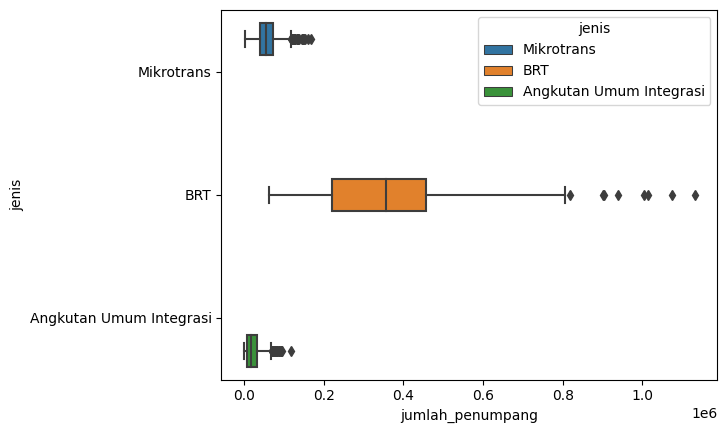

In [65]:
import seaborn as sns
sns.boxplot(y='jenis', x='jumlah_penumpang', data=df, hue= 'jenis')

Mencari batas q3 sebagai acuan outlier tertinggi untuk menghandle outlier pada masing masing jenis angkutan umum

In [132]:
# pengambilan data berdasarkan jenis angkutan BRT
dfBRT = df.loc[df['jenis'] == 'BRT']

# Mencari outliers
def BRT(dfBRT):
    q1=dfBRT.quantile(0.25)
    q3=dfBRT.quantile(0.75)
    IQR=q3-q1
    outliers = dfBRT[((dfBRT<(q1-1.5*IQR)) | (dfBRT>(q3+1.5*IQR)))]
    return outliers

outliersBRT = BRT(dfBRT['jumlah_penumpang'])
print('number of outliers: '+ str(len(outliersBRT)))
print('max outlier value: '+ str(outliersBRT.max()))
print('min outlier value: '+ str(outliersBRT.min()))

number of outliers: 8
max outlier value: 1131439
min outlier value: 819178


In [122]:
dfBRT[dfBRT['jumlah_penumpang'] > 1131439]

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang


In [133]:
# pengambilan data berdasarkan jenis angkutan Mikrotrans
dfMikrotrans = df.loc[df['jenis'] == 'Mikrotrans']

# Mencari outliers
def Mikrotrans(dfMikrotrans):
    q1=dfMikrotrans.quantile(0.25)
    q3=dfMikrotrans.quantile(0.75)
    IQR=q3-q1
    outliers = dfMikrotrans[((dfMikrotrans<(q1-1.5*IQR)) | (dfMikrotrans>(q3+1.5*IQR)))]
    return outliers

outliersMikrotrans = Mikrotrans(dfMikrotrans['jumlah_penumpang'])
print('number of outliers: '+ str(len(outliersMikrotrans)))
print('max outlier value: '+ str(outliersMikrotrans.max()))
print('min outlier value: '+ str(outliersMikrotrans.min()))

number of outliers: 25
max outlier value: 167782
min outlier value: 118492


In [134]:
dfMikrotrans[dfMikrotrans['jumlah_penumpang'] > 167782]

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang


In [135]:
# pengambilan data berdasarkan jenis Angkutan Umum Integrasi
dfAUI = df.loc[df['jenis'] == 'Angkutan Umum Integrasi']

# Mencari outliers
def AUI(dfAUI):
    q1=dfAUI.quantile(0.25)
    q3=dfAUI.quantile(0.75)
    IQR=q3-q1
    outliers = dfAUI[((dfAUI<(q1-1.5*IQR)) | (dfAUI>(q3+1.5*IQR)))]
    return outliers

outliersAUI = AUI(dfAUI['jumlah_penumpang'])
print('number of outliers: '+ str(len(outliersAUI)))
print('max outlier value: '+ str(outliersAUI.max()))
print('min outlier value: '+ str(outliersAUI.min()))

number of outliers: 39
max outlier value: 118725
min outlier value: 69464


In [136]:
dfAUI[dfAUI['jumlah_penumpang'] > 118725]

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang


Setelah mencari batas q3 dilanjutkan dnegan mencari median dan MAD pada maisng masing jenis angkutan umum sebagai acuan dalam melakukan pengelompokan data.

In [137]:
# find the median and MAD BRT
medianBRT = dfBRT.jumlah_penumpang.median()
madBRT = abs(dfBRT.jumlah_penumpang - dfBRT.jumlah_penumpang.median()).median()

Lower = medianBRT - madBRT
Upper = medianBRT + madBRT

print(f'Median : {medianBRT}, MAD : {madBRT}\n Lower :{Lower}, Upper : {Upper}')

Median : 357060.0, MAD : 109218.0
 Lower :247842.0, Upper : 466278.0


In [138]:
# kategory jumlah penumpang BRT by median and MAD
def BRT(dfBRT):
    if 466278 > dfBRT['jumlah_penumpang'] > 247842:
        return "Ramai Penumpang"
    elif dfBRT['jumlah_penumpang'] <= 247842:
        return "Sepi penumpang"
    else:
        return "Padat Penumpang"
    
# Membuat kolom 'Category_Discount'    
dfBRT['kategori_penumpang'] = dfBRT.apply(BRT, axis=1)
dfBRT.head()

/var/folders/jt/vl22sbsx255g7ppvxz8rtv5m0000gn/T/ipykernel_1208/2889433210.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfBRT['kategori_penumpang'] = dfBRT.apply(BRT, axis=1)


,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,kategori_penumpang
70,2021,10,BRT,9,Pinang Ranti - Pluit,670052,Padat Penumpang
71,2021,10,BRT,8,Lebak Bulus - Harmoni,442361,Ramai Penumpang
72,2021,10,BRT,7,Kampung Rambutan - Kampung Melayu,376261,Ramai Penumpang
73,2021,10,BRT,6,Ragunan - Dukuh Atas 2,348321,Ramai Penumpang
74,2021,10,BRT,5,Kampung Melayu - Ancol,430590,Ramai Penumpang


In [139]:
# find the median and MAD Mikrotrans
medianMikrotrans = dfMikrotrans.jumlah_penumpang.median()
madMikrotrans = abs(dfMikrotrans.jumlah_penumpang - dfMikrotrans.jumlah_penumpang.median()).median()

Lower = medianMikrotrans - madMikrotrans
Upper = medianMikrotrans + madMikrotrans

print(f'Median : {medianMikrotrans}, MAD : {madMikrotrans}\n Lower :{Lower}, Upper : {Upper}')

Median : 55168.5, MAD : 15213.5
 Lower :39955.0, Upper : 70382.0


In [140]:
# kategory jumlah penumpang BRT by median and MAD
def Mikrotrans(dfMikrotrans):
    if 70382 > dfMikrotrans['jumlah_penumpang'] > 39955:
        return "Ramai Penumpang"
    elif dfMikrotrans['jumlah_penumpang'] <= 39955:
        return "Sepi penumpang"
    else:
        return "Padat Penumpang"
    
# Membuat kolom 'Category_Discount'    
dfMikrotrans['kategori_penumpang'] = dfMikrotrans.apply(Mikrotrans, axis=1)
dfMikrotrans.head()

/var/folders/jt/vl22sbsx255g7ppvxz8rtv5m0000gn/T/ipykernel_1208/3471045829.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMikrotrans['kategori_penumpang'] = dfMikrotrans.apply(Mikrotrans, axis=1)


,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,kategori_penumpang
0,2021,10,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197,Sepi penumpang
1,2021,10,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711,Sepi penumpang
2,2021,10,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186,Ramai Penumpang
3,2021,10,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883,Ramai Penumpang
4,2021,10,Mikrotrans,JAK.77,Tanjung Priok - Jembatan Item,66616,Ramai Penumpang


In [141]:
# find the median and MAD Angkutan Umum Integrasi
medianAUI = dfAUI.jumlah_penumpang.median()
madAUI = abs(dfAUI.jumlah_penumpang - dfAUI.jumlah_penumpang.median()).median()

Lower = medianAUI - madAUI
Upper = medianAUI + madAUI

print(f'Median : {medianAUI}, MAD : {madAUI}\n Lower :{Lower}, Upper : {Upper}')

Median : 17270.0, MAD : 11180.0
 Lower :6090.0, Upper : 28450.0


In [142]:
# kategory jumlah penumpang BRT by median and MAD
def AUI(dfAUI):
    if 28450 > dfAUI['jumlah_penumpang'] > 6090:
        return "Ramai Penumpang"
    elif dfAUI['jumlah_penumpang'] <= 6090:
        return "Sepi penumpang"
    else:
        return "Padat Penumpang"
    
# Membuat kolom 'Category_Discount'    
dfAUI['kategori_penumpang'] = dfAUI.apply(AUI, axis=1)
dfAUI.head()

/var/folders/jt/vl22sbsx255g7ppvxz8rtv5m0000gn/T/ipykernel_1208/3234595721.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfAUI['kategori_penumpang'] = dfAUI.apply(AUI, axis=1)


,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,kategori_penumpang
83,2021,10,Angkutan Umum Integrasi,9H,Cipedak - Blok M,16256,Ramai Penumpang
84,2021,10,Angkutan Umum Integrasi,9E,Kebayoran Lama - Jelambar,16905,Ramai Penumpang
85,2021,10,Angkutan Umum Integrasi,9D,Pasar Minggu - Tanah Abang,81799,Padat Penumpang
86,2021,10,Angkutan Umum Integrasi,8K,Batu Sari-Tanah Abang,8122,Ramai Penumpang
87,2021,10,Angkutan Umum Integrasi,8E,Bintaro - Blok M,18112,Ramai Penumpang


## **Data Bersih**

Mari kita lihat informasi data yang baru setelah melakukan cleansing data. Sebelum itu, kita satukan terlebih dahulu data yang benar menjadi satu dataframe dna melakukan insert index berdasarkan bulan Januari 2021.

#### Penggabungan Data

In [144]:
dfNew = pd.concat([dfBRT, dfMikrotrans, dfAUI], axis = 0)
dfNew.sort_index().head()

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,kategori_penumpang
0,2021,10,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197,Sepi penumpang
1,2021,10,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711,Sepi penumpang
2,2021,10,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186,Ramai Penumpang
3,2021,10,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883,Ramai Penumpang
4,2021,10,Mikrotrans,JAK.77,Tanjung Priok - Jembatan Item,66616,Ramai Penumpang


#### Reset Index

In [87]:
dfNew = dfNew.sort_values('bulan', ascending=True)
#Reset index
dfNew = dfNew.reset_index(drop=True)

dfNew.head()

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,kategori_penumpang
0,2021,1,Angkutan Umum Integrasi,1C,Pesanggrahan - Blok M,18502,Ramai Penumpang
1,2021,1,Mikrotrans,JAK.32,Lebak Bulus - Petukangan,83768,Padat Penumpang
2,2021,1,Angkutan Umum Integrasi,10K,Tanjung Priok - Senen via Taman BMW,41881,Padat Penumpang
3,2021,1,Angkutan Umum Integrasi,11D,Pulo Gebang - Pulo Gadung 2 via PIK,61434,Padat Penumpang
4,2021,1,Angkutan Umum Integrasi,11Q,Kampung Melayu - Pulo Gebang via BKT,9436,Ramai Penumpang


#### Informasi Dataset Terbaru

In [145]:
print(f'Jumlah baris dan kolom di dataset df adalah {dfNew.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (1473, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tahun             1473 non-null   int64 
 1   bulan             1473 non-null   int64 
 2   jenis             1473 non-null   object
 3   kode_trayek       1473 non-null   object
 4   trayek            1473 non-null   object
 5   jumlah_penumpang  1473 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 69.2+ KB


In [146]:
pd.DataFrame(
    {
    'feature': dfNew.columns.values,
    'data_type': dfNew.dtypes.values,
    'null_value': [dfNew[col].isna().sum() for col in dfNew.columns],
    '%null_value': dfNew.isna().mean().values * 100,
    'n_unique': dfNew.nunique().values,
    'sample_unique': [dfNew[col].unique() for col in dfNew.columns]
    }
)

,feature,data_type,null_value,%null_value,n_unique,sample_unique
0,tahun,int64,0,0.0,1,[2021]
1,bulan,int64,0,0.0,12,"[10, 8, 3, 6, 1, 5, 12, 9, 2, 7, 4, 11]"
2,jenis,object,0,0.0,3,"[BRT, Mikrotrans, Angkutan Umum Integrasi]"
3,kode_trayek,object,0,0.0,131,"[9, 8, 7, 6, 5, 4, 3, 2, 13, 12, 11, 10, 1, JAK.88, JAK.85, JAK.84, JAK.80, JAK.77, JAK.75, JAK.74, JAK.73, JAK.72, JAK.71, JAK.64, JAK.61, JAK.60, JAK.59, JAK.58, JAK.56, JAK.54, JAK.53, JAK.52, JAK.51, JAK.50, JAK.49, JAK.47, JAK.46, JAK.45, JAK.44, JAK.43, JAK.42, JAK.41, JAK.40, JAK.39, JAK.38, JAK.37, JAK.36, JAK.35, JAK.34, JAK.33, JAK.32, JAK.31, JAK.30, JAK.29, JAK.28, JAK.27, JAK.26, JAK.25, JAK.24, JAK.22, JAK.21, JAK.20, JAK.19, JAK.18, JAK.17, JAK.16, JAK.15, JAK.14, JAK.13, JAK.12, JAK.117, JAK.112, JAK.11, JAK.10, JAK.09, JAK.08, JAK.07, JAK.06, JAK.05, JAK.04, JAK.03, JAK.02, JAK.01, JAK.10B, JAK.10A, 9H, 9E, 9D, 8K, 8E, 8D, 8C, 7P, 7D, 7B, 7A, 6R, 6N, 6M, 6H, ...]"
4,trayek,object,0,0.0,131,"[Pinang Ranti - Pluit, Lebak Bulus - Harmoni, Kampung Rambutan - Kampung Melayu, Ragunan - Dukuh Atas 2, Kampung Melayu - Ancol, Pulo Gadung 2 - Tosari, Kalideres - Pasar Baru, Pulo Gadung 1 - Harmoni, Ciledug - Tendean, Penjaringan - Sunter Bouleverd Barat, Pulo Gebang - Kampung Melayu, Tanjung Priok - PGC 2, Blok M - Kota, Terminal Tanjung Priok - Ancol Barat, Bintara - Cipinang Indah, Terminal Kampung Melayu - Kapin Raya, Rawa Buaya - Rawa Kompeni, Tanjung Priok - Jembatan Item, Cililitan - Kp. Pulo, Terminal Rawamangun - Cipinang Muara, Jambore Cibubur - Pasar Rebo, Kampung Rambutan - Pasar Rebo via Poncol, Kampung Rambutan - Pinang Ranti, Lenteng Agung - Aseli, Cempaka Putih - Pulo Gadung via Kelapa Gading, Kelapa Gading - Rusun Kemayoran, Rawamangun - Tanah Merah, Cilingcing - Rorotan, Grogol - Srengseng, Grogol - Benhil, Grogol - Pos Pengumben via Slipi, Kalideres - Muara Angke, Taman Kota - Budi Luhur, Kalideres - Puri Kembangan, Lebak Bulus - Cipulir, Pasar Minggu - Ciganjur via KB Ragunan, Pasar Minggu - Jagakarsa, Lebak Bulus - Ragunan, Andara - Stasiun Universitas Pancasila, Tongtek - Cililitan, Kampung Melayu - Pondok Kelapa, Kampung Melayu - Pulo Gadung, Harapan Baru - Pulo Gebang via Rawa Kuning, Kalimalang - Duren Sawit, Bulak Ringin - Kampung Rambutan, Cililitan - Condet via Kayu Manis, Cilangkap - Cililitan, Pangkalan Jati - Rawamangun, Rawamangun - Klender, Pulo Gadung - Kota, Lebak Bulus - Petukangan, Blok M - Andara, Grogol - Meruya via Roxy, Tanjung Priok - Sukapura, Kp. Rambutan - Taman Wiladatika, Pulo Gebang - Rorotan, Rawamangun - Duren Sawit, Kp. Rambutan - Kalisari, Senen - Pulo Gadung via Kelapa Gading, Dwikora - Penas Kalimalang, Cililitan - Dwikora, Cawang UKI - Lubang Buaya, Pinang Ranti - Kampung Rambutan, Kalibata - Kuningan, Senen - Pulo Gadung, Cililitan - Condet, Bulak Turi - Tanjung Priok, Tanah Abang - Meruya, Tanah Abang - Kota Intan via Jembatan Lima, Tanah Abang - Kebayoran Lama via Pos Pengumben, Tanjung Priok - Tanah Merdeka, Terminal Tanah Merah - Pulo Gadung, Tanah Abang - Kebayoran Lama, Tanah Abang - Kota, Roxy Mas - Karet, Roxy - Benhil, Tanah Abang - Grogol via Tawakal, Kampung Rambutan - Pondok Gede, Semper - Rorotan, Grogol - Tubagus Angke, Lebak Bulus - Andara, Kampung Melayu - Duren Sawit, Tanjung Priok - Plumpang, Gondangdia - Cikini via Kramat Raya, Gondangdia - Cikini via Salemba Raya, Cipedak - Blok M, Kebayoran Lama - Jelambar, Pasar Minggu - Tanah Abang, Batu Sari-Tanah Abang, Bintaro - Blok M, Joglo - Blok M, Kebayoran Lama - Tanah Abang, Pondok Kelapa - BKN, Pancoran - TMII, Kampung Rambutan - Blok M, Kampung Rambutan - Lebak Bulus, Ragunan - Stasiun MRT Fatmawati, Ragunan - Blok M via Kemang, Stasiun Manggarai - Blok M, Senen - Lebak Bulus, ...]"
5,jumlah_penumpang,int64,0,0.0,1420,"[670052, 442361, 376261, 348321, 430590, 274326, 466445, 331229, 307410, 140853, 135543, 369184, 903783, 399358, 248009, 211537, 194549, 228704, 147131, 263067, 182122, 160187, 80348, 74753, 213453, 462959, 756064, 508851, 453819

Sebelum melakukan cleansing data, dataset Transjakarta Passenger memiliki 6 kolom dan 1473 baris. Setelah dilakukan cleansing data, terdapat penambahan 1 kolom `kategori_penumpang` yang digunakan untuk menghandle outlier yang ada pada `jumlah_penumpang`.

#### Dataset Pulo Gadung

In [152]:
dfPG = df[df.trayek.str.contains('Pulo Gadung')]
dfPG = dfPG.sort_values('bulan', ascending=True)
dfPG = dfPG.reset_index(drop=True)
dfPG.head()

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
0,2021,1,Mikrotrans,JAK.17,Senen - Pulo Gadung,33859
1,2021,1,Mikrotrans,JAK.33,Pulo Gadung - Kota,46531
2,2021,1,Mikrotrans,JAK.24,Senen - Pulo Gadung via Kelapa Gading,68914
3,2021,1,Mikrotrans,JAK.112,Terminal Tanah Merah - Pulo Gadung,52710
4,2021,1,BRT,4,Pulo Gadung 2 - Tosari,249575


## **Saving Data**

In [147]:
import os
os.listdir()

['cobacleaning.ipynb',
 '.DS_Store',
 'trayek transjakarta.xlsx',
 'TransJakarta Passengers 2021.csv',
 'cleaned_data.csv',
 'data exploration.ipynb',
 'kode trayek transjakarta.docx',
 'transjakarta analysis.ipynb']

In [148]:
dfNew.to_csv(f'../../../Purwadhika/Project/Capstone Project 2/cleaned_data.csv')

In [153]:
dfPG.to_csv(f'../../../Purwadhika/Project/Capstone Project 2/cleanedDataPG.csv')